In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
datos = pd.read_csv('advertising.csv')

In [8]:
datos.head(5)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


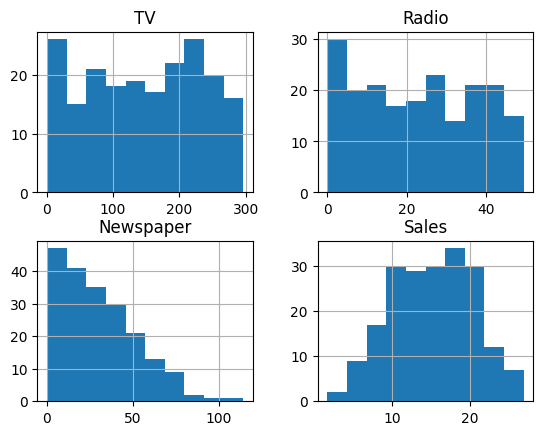

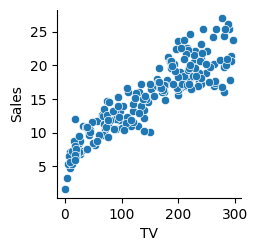

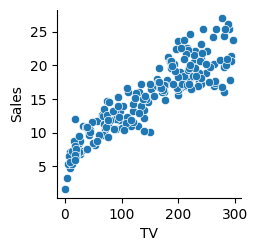

In [47]:
sns.pairplot(datos,x_vars=['TV'],y_vars=['Sales'])
plt.show()


In [ ]:
datos.describe()

In [ ]:
datos.boxplot()

In [ ]:
datos.hist()

In [17]:
datos.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
%pip install statsmodels ## libreria de esta versión

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = datos[['TV','Radio','Newspaper']]
X = add_constant(X)

VIF_data = pd.DataFrame()
VIF_data['Variable']=X.columns
VIF_data['VIF'] = [variance_inflation_factor(X.values,i) for i in range (X.shape[1])]
VIF_data


,Variable,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Newspaper,1.145187


In [48]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [50]:
X = datos[['TV','Radio','Newspaper']]
y = datos[['Sales']]


In [52]:
model.fit(X,y)

LinearRegression()

In [53]:
model.intercept_

array([4.62512408])

In [54]:
model.coef_

array([[0.05444578, 0.10700123, 0.00033566]])

In [58]:
sales_pred = model.predict(X)

In [ ]:
plt.scatter(datos['Sales'],sales_pred)
plt.plot([sales_pred.min(),sales_pred.max()],[sales_pred.min(),sales_pred.max()],'-r')
plt.show()

In [ ]:
residuos = y-sales_pred
plt.scatter(sales_pred,residuos)
plt.hlines(y=0,xmin=sales_pred.min(),xmax=sales_pred.max(),linestyles='--r')

In [69]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [71]:
x_2 = datos[['TV','Radio','Newspaper']]
x_2 = add_constant(x_2)

Y_2 = datos[['Sales']]

In [73]:
model_2=sm.OLS(Y_2,x_2).fit()
model_2.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

# MODELO PCA

In [75]:
##librerias

import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.decomposition import PCA 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [76]:
datos = pd.read_csv('advertising.csv') ## lectura de datos

In [94]:
modelo = Pipeline([
    ('Scalar',StandardScaler()),
    ('PCA',PCA()),
    ('regresion',LinearRegression())
    ])

In [95]:
x = datos[['TV','Radio','Newspaper']] ## asignacion de variable
y= datos['Sales']

In [96]:
modelo.fit(x,y)

Pipeline(steps=[('Scalar', StandardScaler()), ('PCA', PCA()),
                ('regresion', LinearRegression())])

## MODELOS NO LINEALES

In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
datos = pd.read_csv('ExpansiónCobre.csv')
datos.head()

,Expansión,Kelvin
0,0.591,24.41
1,1.547,34.82
2,2.902,44.09
3,2.894,45.07
4,4.703,54.98


In [ ]:
plt.scatter(datos['Kelvin'],datos['Expansión'])
plt.show()

In [105]:
def logistica(t,a,m,n,tau):
    return a*(1+m*np.exp(-t/tau))/(1+n*np.exp(-t/tau)) ## funcion que describe un comportamiento logistico

In [106]:
x = datos['Kelvin'].values # def de valores
y= datos['Expansión'].values

In [107]:
from scipy.optimize import curve_fit

In [131]:
params, params_cov = curve_fit(logistica,x,y) ## modelo de prediccion

In [123]:
params ## mostrar valores para cada variable

array([-3.31837775e+00,  1.78828336e-01, -5.66837230e-04,  7.72580215e-07,
       -3.69934874e-10])

In [132]:
y_pred = logistica(x,*params) ##*params llama los valores

In [126]:
from sklearn.metrics import r2_score,mean_squared_error

In [127]:
score = r2_score(y,y_pred)  ## calculo de correlacion
score

0.9934580865198855

In [116]:
mean_squared_error(y,y_pred)

np.float64(0.31030597650910163)

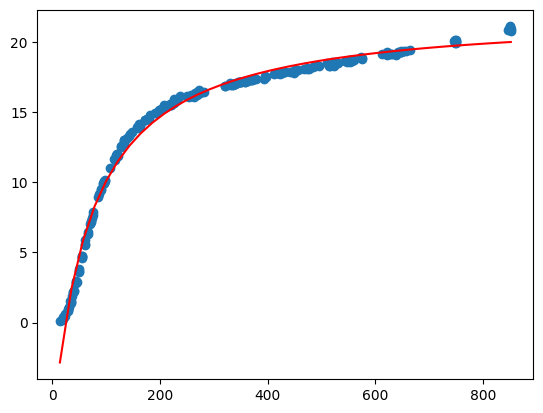

In [133]:
kelvin = np.linspace(x.min(),x.max(),40) ## graficado de datos
plt.scatter(x,y)
plt.plot(kelvin,logistica(kelvin,*params),color = 'r')
plt.show()

In [130]:
def polinomio(x,a,b,c,d): ## si hacemos el calculo con 
    return a + b * x +c*x**2 + d *x**3 

## prueba de segmentacion de valores

In [136]:
import pandas as pd
import matplotlib.pyplot as plt

In [139]:
df = pd.read_csv('ExpansiónCobre.csv')
x= df['Kelvin'].values
y= df['Expansión'].values

In [138]:
from sklearn.model_selection import train_test_split

In [154]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [155]:
def polinomio(x,a,b,c,d,e,f): ## si hacemos el calculo con 
    return a + b * x +c*x**2 + d *x**3 + e*x**4 + f*x**5

In [156]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score,mean_squared_error
params, params_cov = curve_fit(polinomio,x_train,y_train) ## modelo de prediccion
y_pred_train = polinomio(x_train,*params) ##*params llama los valores
y_pred_test = polinomio(x_test,*params)

In [ ]:
mean_squared_error(y_train,y_pred_train)

In [161]:
mean_squared_error(y_test,y_pred_test)

np.float64(0.05799111566796885)

## Modelo kennand stone

In [ ]:
!pip install kennard-stone

In [162]:
from kennard_stone import train_test_split

In [163]:
import pandas as pd
import matplotlib.pyplot as plt

In [168]:
df = pd.read_csv('ExpansiónCobre.csv')
x= df['Kelvin'].values.reshape(-1,1)
y= df['Expansión'].values

In [171]:
from kennard_stone import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.


In [172]:
def polinomio(x,a,b,c,d,e,f): ## si hacemos el calculo con 
    return a + b * x +c*x**2 + d *x**3 + e*x**4 + f*x**5

In [174]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score,mean_squared_error

params, params_cov = curve_fit(polinomio,x_train.flatten(),y_train) ## modelo de prediccion

y_pred_train = polinomio(x_train,*params) ##*params llama los valores
y_pred_test = polinomio(x_test,*params)

In [ ]:
mean_squared_error(y_train,y_pred_train)

In [176]:
mean_squared_error(y_test,y_pred_test)

np.float64(0.09306621227256441)